In [1]:
# import all the necessary libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import GridSearchCV

In [2]:
# read the data from the csv file
df_houses = pd.read_csv('../data/regression_housedata.csv', sep=';')

# print the first 5 rows of the data
df_houses.head()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900.0
1,6414100192,3,2570,7242,2,2170,400,538000.0
2,5631500400,2,770,10000,1,770,0,180000.0
3,2487200875,4,1960,5000,1,1050,910,604000.0
4,1954400510,3,1680,8080,1,1680,0,510000.0


In [3]:
df_houses.shape

(999, 8)

In [4]:
df_houses.describe()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
count,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02
mean,4.506224e+09,3.349349,2051.397397,14707.242242,1.397397,1750.233233,301.164164,5.207145e+05
std,2.866822e+09,0.852367,888.351113,28975.077254,0.527057,790.466905,451.023402,3.397491e+05
min,1.150089e+07,0.000000,380.000000,649.000000,1.000000,380.000000,0.000000,8.000000e+04
25%,1.954570e+09,3.000000,1405.000000,5419.000000,1.000000,1190.000000,0.000000,3.098000e+05
50%,3.869900e+09,3.000000,1900.000000,8040.000000,1.000000,1540.000000,0.000000,4.350000e+05
75%,7.291250e+09,4.000000,2475.000000,11508.500000,2.000000,2135.000000,580.000000,6.344625e+05
max,9.828703e+09,7.000000,6070.000000,315374.000000,3.000000,6070.000000,2060.000000,3.080000e+06


In [5]:
# check for missing values and data types
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             999 non-null    int64  
 1   bedrooms       999 non-null    int64  
 2   sqft_living    999 non-null    int64  
 3   sqft_lot       999 non-null    int64  
 4   floors         999 non-null    int64  
 5   sqft_above     999 non-null    int64  
 6   sqft_basement  999 non-null    int64  
 7   price          999 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 62.6 KB


In [6]:
df_houses.isnull().sum()

id               0
bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

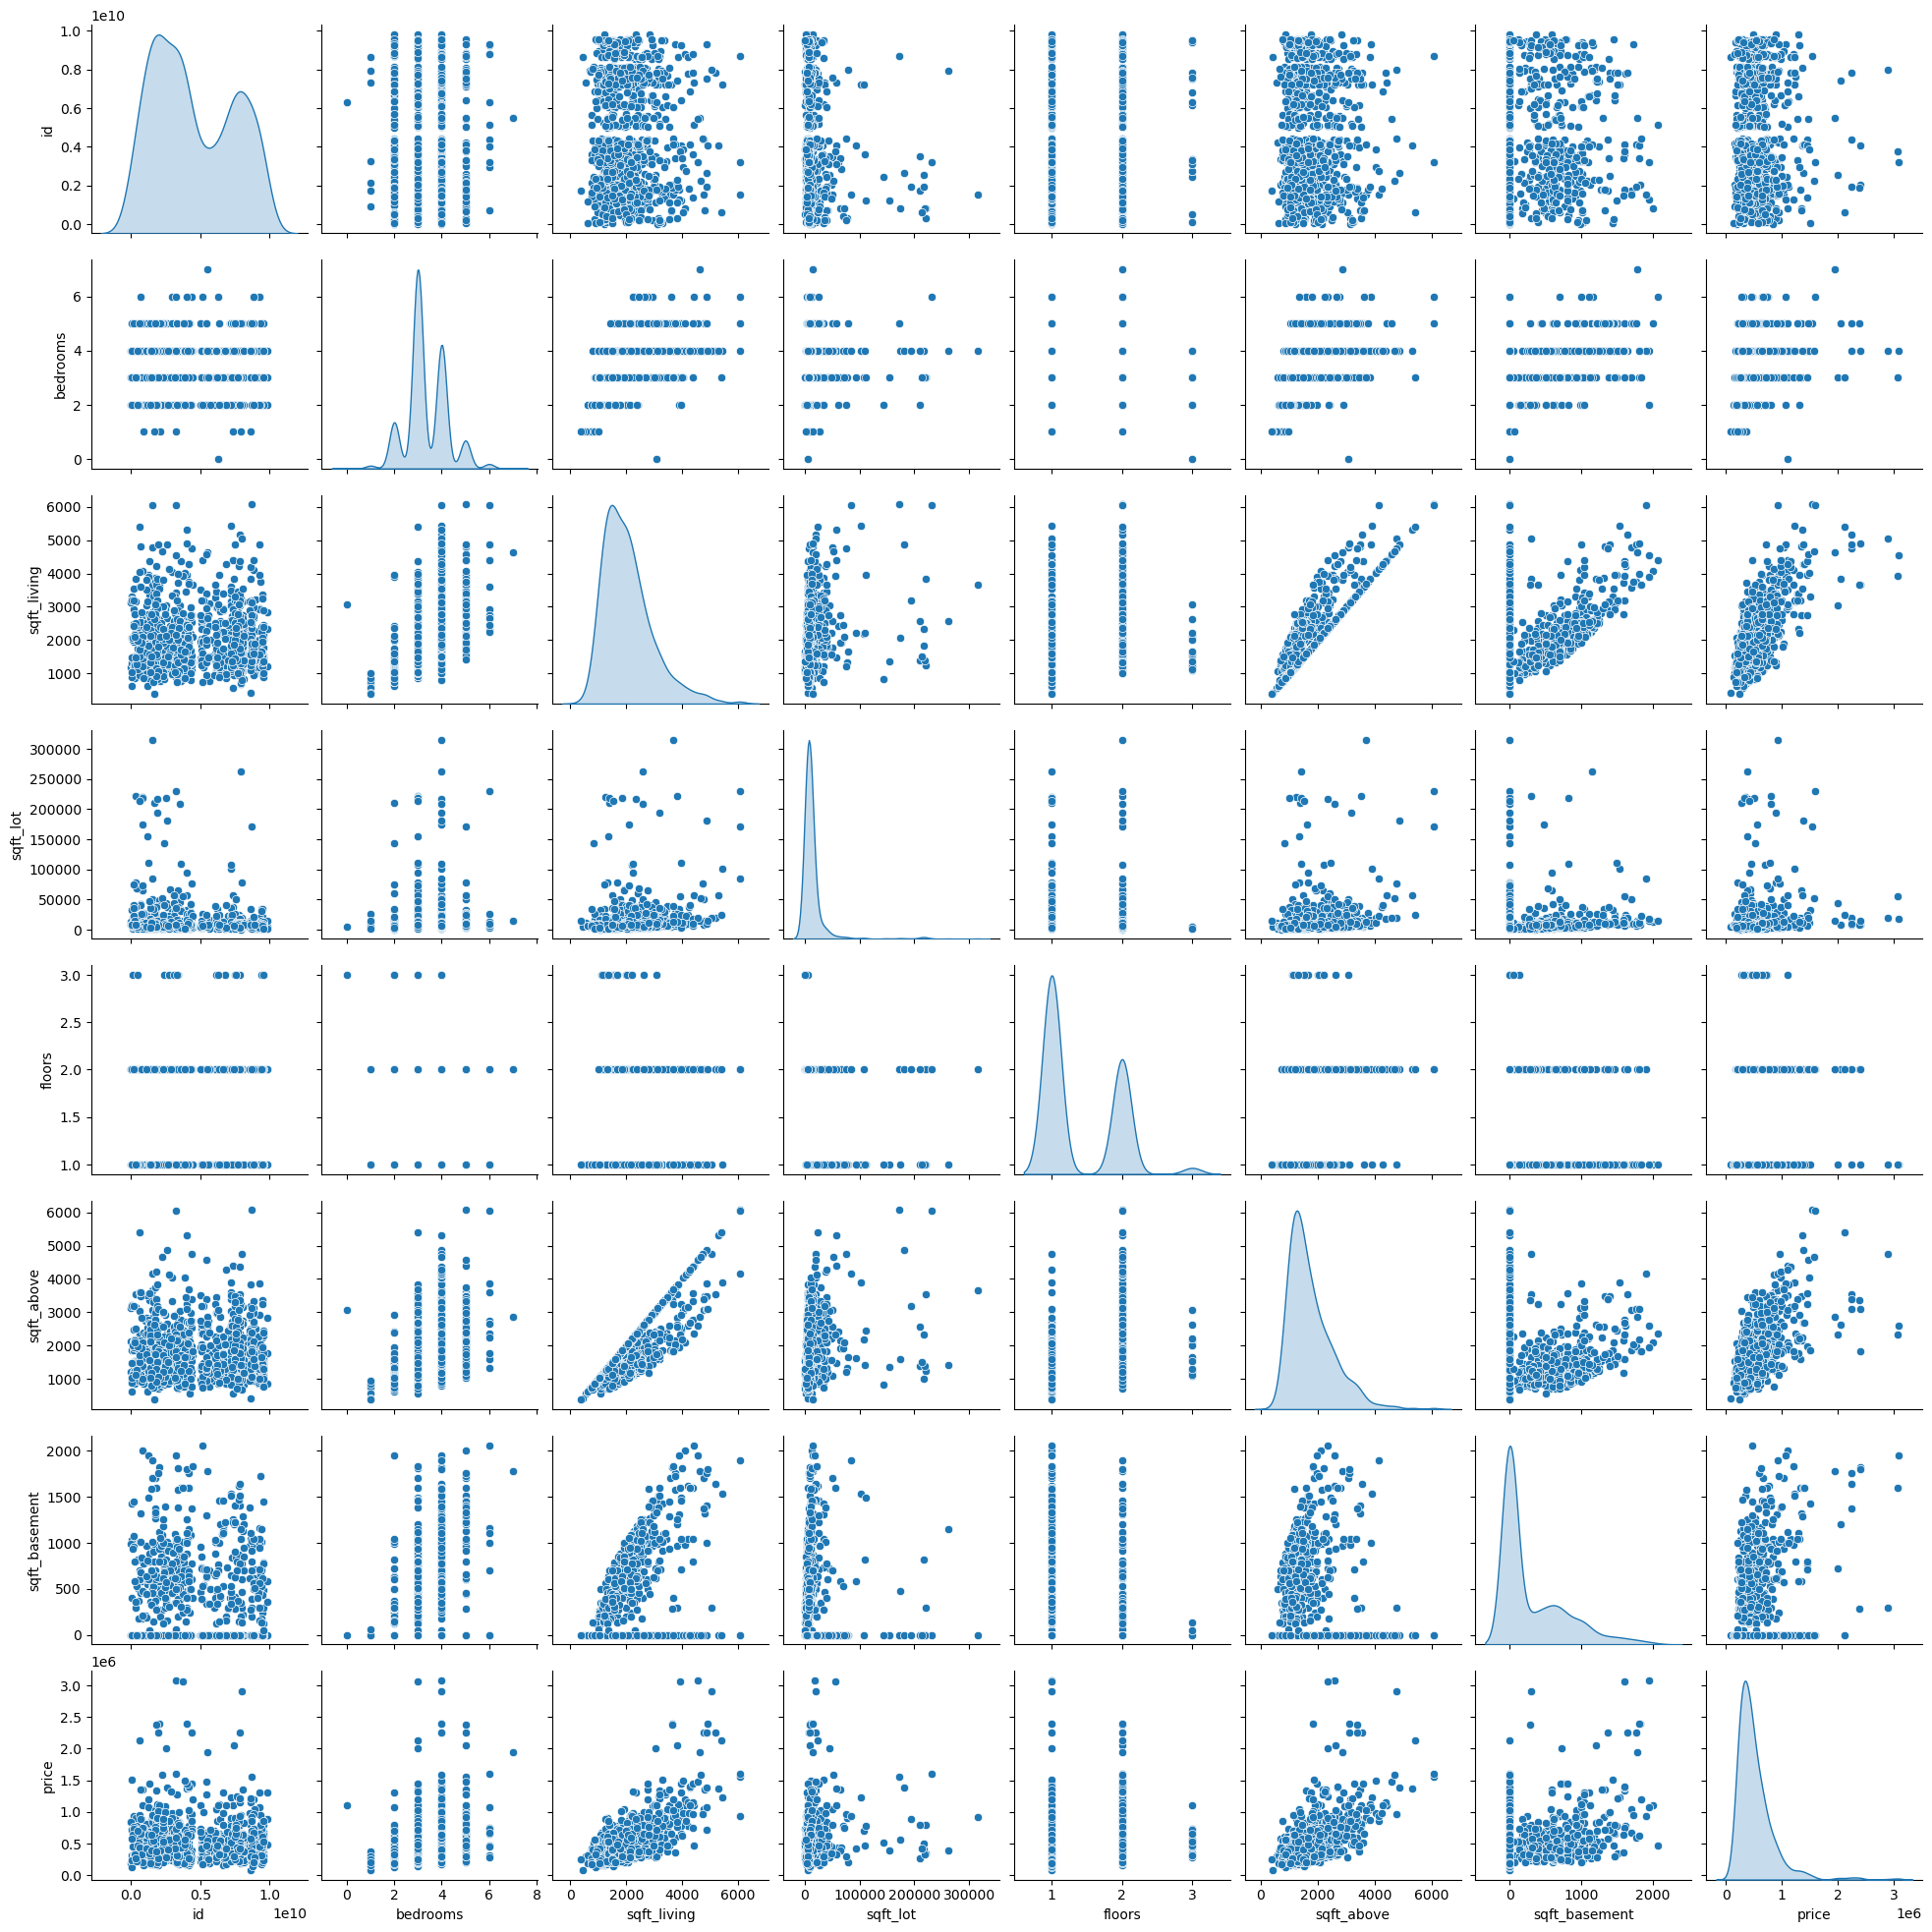

In [7]:
# pairplot to check for correlation
import seaborn as sns
sns.pairplot(df_houses, diag_kind = "kde")


In [8]:
# define the feature matrix X and the target variable y
X = df_houses.drop(['price', 'id'], axis=1)
y = df_houses[['price']]

In [54]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((799, 6), (799, 1), (200, 6), (200, 1))

In [55]:
# standardize the data
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create an instance of the model
model = LinearRegression()

# fit the model
model.fit(X_train, y_train)

# make predictions
y_pred_linear = model.predict(X_test)

In [57]:
parameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error', verbose=0)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'copy_X': True, 'fit_intercept': True}

In [58]:
# create an instance of the model
mlr_tuned = LinearRegression(copy_X=True, fit_intercept=True)

# fit the model
mlr_tuned.fit(X_train, y_train)

# make predictions
y_pred_linear_tuned = mlr_tuned.predict(X_test)


## Decision Tree Regressor

In [59]:
from sklearn import tree

# create an instance of the model
dct = tree.DecisionTreeRegressor()

# fit the model
dct.fit(X_train, y_train)

# make predictions
y_pred_tree = dct.predict(X_test)

In [60]:


parameters={
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5,6,7,8,9,10]
}

tuning_model = GridSearchCV(dct, parameters, cv=5, scoring='neg_mean_squared_error')

tuning_model.fit(X_train,y_train)

tuning_model.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [61]:
dct_tuned = tree.DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=2)

dct_tuned.fit(X_train, y_train)

y_pred_tree_tuned = dct_tuned.predict(X_test)

## Support Vector Regressor

In [62]:
from sklearn import svm

# create an instance of the model
svr = svm.SVR()

# fit the model
svr.fit(X_train_scaled, y_train)

# make predictions
y_pred_svr = svr.predict(X_test_scaled)

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [63]:
# tune the parameters
parameters={
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

tuning_model_svr = GridSearchCV(svr, parameters, cv=5, scoring='neg_mean_squared_error')

tuning_model_svr.fit(X_train_scaled,y_train)

tuning_model_svr.best_params_

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

{'C': 1000, 'gamma': 1, 'kernel': 'poly'}

In [64]:
svr_tuned = svm.SVR(C=1000, gamma=1, kernel='poly')

svr_tuned.fit(X_train_scaled, y_train)

y_pred_svr_tuned = svr_tuned.predict(X_test_scaled)

/Users/jesselang/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
# Define evaluation functions
def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# Evaluate Linear Regression
rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear)
rmse_linear_tuned, r2_linear_tuned = evaluate_model(y_test, y_pred_linear_tuned)

# Evaluate Decision Tree Regressor
rmse_tree, r2_tree = evaluate_model(y_test, y_pred_tree)

# Evaluate Decision Tree Regressor
rmse_tree_tuned, r2_tree_tuned = evaluate_model(y_test, y_pred_tree_tuned)

# Evaluate Support Vector Regressor
rmse_svr, r2_svr = evaluate_model(y_test, y_pred_svr)

# Evaluate Support Vector Regressor
rmse_svr_tuned, r2_svr_tuned = evaluate_model(y_test, y_pred_svr_tuned)

In [66]:
print("Linear Regression - RMSE:", rmse_linear, " R2:", r2_linear)
print("Linear Regression Tuned - RMSE:", rmse_linear_tuned, " R2:", r2_linear_tuned)
print("Decision Tree Regressor - RMSE:", rmse_tree, " R2:", r2_tree)
print("Decision Tree Regressor Tuned - RMSE:", rmse_tree_tuned, " R2:", r2_tree_tuned)
print("Support Vector Regressor - RMSE:", rmse_svr, " R2:", r2_svr)
print("Support Vector Regressor Tuned - RMSE:", rmse_svr_tuned, " R2:", r2_svr_tuned)


Linear Regression - RMSE: 226756.34334110876  R2: 0.5851011483373523
Linear Regression Tuned - RMSE: 226756.34334110876  R2: 0.5851011483373523
Decision Tree Regressor - RMSE: 313743.8545664839  R2: 0.205719686412987
Decision Tree Regressor Tuned - RMSE: 284215.3640383702  R2: 0.34819386287854315
Support Vector Regressor - RMSE: 360083.3722795932  R2: -0.04623556090534686
Support Vector Regressor Tuned - RMSE: 297016.50037301285  R2: 0.28815654516198674
